# Tutorial for Simple Classification Model
Author: Dr Ambikesh Jayal, PhD, MSc, BSc, FEHA, MBCS
Web: https://sites.google.com/site/ambi1999/main
Github: https://github.com/ambi1999

**Code used in tutorial is available from link below:**

1. https://github.com/ambi1999/ForDemo/blob/main/Ambi_ML_Tutorial_Classification.ipynb
2. https://colab.research.google.com/drive/1QPoEStBQf8R6hS0pAorbHUSSS4VFbGtA?usp=sharing

# **Step 1:** Reading data using Pandas dataframe
# **Step 2:** Data Cleaning
# **Step 3:** Data Exploration
# **Step 4:** Feature Selection
# **Step 5:** Split into Training and Testing set 
# **Step 5:** Build Model
# **Step 6:** Check performance of the model on testing and traning set 
(Please note that the performance will always be higher in training set, the real measure of is performance of model in testing set)


# Below are some useful links

# 1. Pands Cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
2. Details about Pandas: https://pandas.pydata.org/docs/user_guide/index.html
3. Details about RandomForestRegressor used in regression
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
4. Details about RandomForestClassifier used in classification
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
5. View .dot tree file at https://dreampuf.github.io/GraphvizOnline

In [2]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

#Reading data from url
url="https://raw.githubusercontent.com/ambi1999/mldataset/main/Boston_housing_dataset_generic_modified_by_ambi/boston_housing_dataset_generic_modified_by_ambi.csv"
df = pd.read_csv(url)

#Reading data from csv, replace the mydata.csv with the full path name of your data file
#df=pd.read_csv("mydata.csv")

print(type(df))
print(df)

<class 'pandas.core.frame.DataFrame'>
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
447  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
448  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
449  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
450  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
451  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT greenarea internetfacility  MDEV investmentrisk  
0      

In [3]:
df.info()
print(df.columns)
print(df.index)
print(df.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CRIM              452 non-null    float64
 1   ZN                452 non-null    float64
 2   INDUS             452 non-null    float64
 3   CHAS              452 non-null    int64  
 4   NOX               452 non-null    float64
 5   RM                452 non-null    float64
 6   AGE               452 non-null    float64
 7   DIS               452 non-null    float64
 8   RAD               452 non-null    int64  
 9   TAX               452 non-null    int64  
 10  PTRATIO           452 non-null    float64
 11  B                 452 non-null    float64
 12  LSTAT             452 non-null    float64
 13  greenarea         452 non-null    object 
 14  internetfacility  452 non-null    object 
 15  MDEV              452 non-null    float64
 16  investmentrisk    452 non-null    object 
dt

In [4]:
#Data Cleaning

# Count number of missing values in each column
print(df.isnull().sum())

#Drop rows with missing values
df = df.dropna(axis=0)



CRIM                0
ZN                  0
INDUS               0
CHAS                0
NOX                 0
RM                  0
AGE                 0
DIS                 0
RAD                 0
TAX                 0
PTRATIO             0
B                   0
LSTAT               0
greenarea           0
internetfacility    0
MDEV                0
investmentrisk      0
dtype: int64


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean     1.420825   12.721239   10.304889    0.077434    0.540816    6.343538   
std      2.495894   24.326032    6.797103    0.267574    0.113816    0.666808   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.069875    0.000000    4.930000    0.000000    0.447000    5.926750   
50%      0.191030    0.000000    8.140000    0.000000    0.519000    6.229000   
75%      1.211460   20.000000   18.100000    0.000000    0.605000    6.635000   
max      9.966540  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean    65.557965    4.043570    7.823009  377.442478   18.247124  369.826504   
std     28.127025    2.0904

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MDEV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

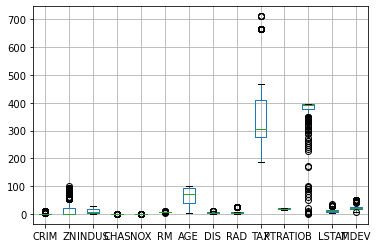

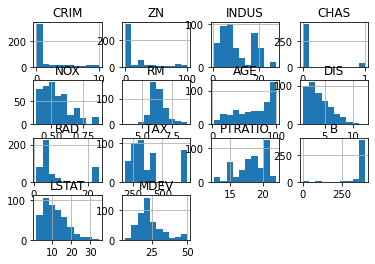

In [5]:
#Data Exploration

print(df.describe())

#df.hist()

df.boxplot()

df.hist()


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.281239  0.573822  0.050066  0.636941 -0.142458  0.447664   
ZN      -0.281239  1.000000 -0.514273 -0.059697 -0.500729  0.306623 -0.555679   
INDUS    0.573822 -0.514273  1.000000  0.103016  0.738517 -0.364895  0.605982   
CHAS     0.050066 -0.059697  0.103016  1.000000  0.134064  0.076580  0.123141   
NOX      0.636941 -0.500729  0.738517  0.134064  1.000000 -0.264594  0.707148   
RM      -0.142458  0.306623 -0.364895  0.076580 -0.264594  1.000000 -0.187871   
AGE      0.447664 -0.555679  0.605982  0.123141  0.707148 -0.187871  1.000000   
DIS     -0.461967  0.656152 -0.669362 -0.140662 -0.745812  0.138774 -0.720334   
RAD      0.897988 -0.266606  0.513306  0.057337  0.542499 -0.095931  0.359326   
TAX      0.825668 -0.269446  0.673312  0.016894  0.615120 -0.214948  0.427095   
PTRATIO  0.319470 -0.364122  0.317336 -0.099623  0.103464 -0.334164  0.192956   
B       -0.413014  0.150380 

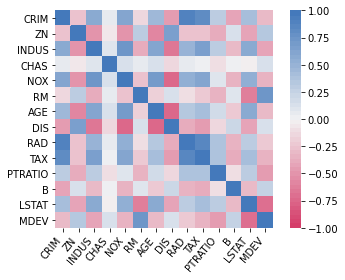

In [6]:
#Data Exploration
import seaborn as sns

print(df.corr())
correlationMatrix=df.corr(method='pearson')
ax = sns.heatmap(
    correlationMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=50),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);

In [7]:
#Feature Selection

#Create separate dataframe for all independed varialbes
#independent_variables=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'greenarea', 'internetfacility', 'MDEV', 'investmentrisk']
#independent_variables=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT' ]

independent_variables=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
                       'AGE', 'DIS','RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 
                       'greenarea', 'internetfacility']
X = df[independent_variables]

print(type(X))
print(X)

#Create a Series for the target variable that we want to predict.
#Note: For Regression problems, target variable will be a continuous variable such as MDEV
#Note: For Classification problems, target variable will be a categorical variable such as investmentrisk
#target_variable='MDEV'
target_variable='investmentrisk'
y=df[target_variable]

print(type(y))
print(y)

# Convert to numpy array
X_numpy = np.array(X)
y_numpy=np.array(y)

print(type(X_numpy))
print(type(y_numpy))

<class 'pandas.core.frame.DataFrame'>
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
447  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
448  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
449  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
450  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
451  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT greenarea internetfacility  
0       15.3  396.90   4.98 

In [8]:
#Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)


In [10]:
print(X_train)

[[0.1146 20.0 6.96 ... 7.73 'high' 'cable']
 [0.11432 0.0 8.56 ... 7.67 'medium' 'cable']
 [8.71675 0.0 18.1 ... 17.12 'low' 'fiberoptics']
 ...
 [9.96654 0.0 18.1 ... 18.85 'medium' 'fiberoptics']
 [0.33045 0.0 6.2 ... 10.88 'low' 'fiberoptics']
 [0.08014 0.0 5.96 ... 8.77 'high' 'fiberoptics']]


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

num_trees=5
#dt_model = RandomForestRegressor(random_state=1, max_depth= 8, max_samples=300, max_features=6, n_estimators=num_trees)
dt_model = RandomForestClassifier(random_state=1, max_depth= 12, max_samples=300, max_features=7, n_estimators=num_trees)



#Fit RandomForestRegressor model
dt_model.fit(X_train, y_train)

print("Making predictions for the following in train set:")
predicted_values=dt_model.predict(X_train[0:10,:])
true_values=y_train[0:10]
print("True values are ",true_values)
print("The predicted values are", predicted_values)
#print("Diff", predicted_values-true_values)

training_accuracy=accuracy_score(true_values, predicted_values, normalize=False)
print("Accuracy Score in Training set", training_accuracy)

print("Making predictions for the following in testing set:")
predicted_values=dt_model.predict(X_test[0:10,:])
true_values=y_test[0:10]
print("True values are ",true_values)
print("The predicted values are", predicted_values)
#print("Diff", predicted_values-true_values)


testing_accuracy=accuracy_score(true_values, predicted_values, normalize=False)
print("Accuracy Score in Testing set", testing_accuracy)

ValueError: could not convert string to float: 'high'

In [ ]:
#Plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#Plot the confusion matrix for training data, include numbers in the plot
plot_confusion_matrix(dt_model, X_train, y_train, values_format="d")

#Plot the confusion matrix for testing data, include numbers in the plot
plot_confusion_matrix(dt_model, X_test, y_test)

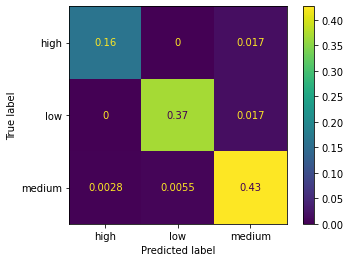

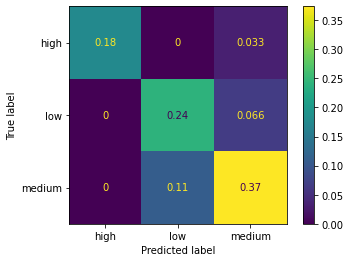

In [25]:
#Plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#Plot the confusion matrix for training data using percentage
plot_confusion_matrix(dt_model, X_train, y_train, normalize="all")

#Plot the confusion matrix for testing data using percentage
plot_confusion_matrix(dt_model, X_test, y_test,normalize="all")


In [33]:
# Average training error
training_accuracy=accuracy_score(y_train,dt_model.predict(X_train))
print("Average Train accuracy ", training_accuracy)

testing_accuracy=accuracy_score(y_test,dt_model.predict(X_test))
print("Average Testing accuracy ", testing_accuracy)

Average Train accuracy  0.9833795013850416
Average Testing accuracy  0.7472527472527473


In [29]:
from sklearn.tree import export_graphviz
# Export as dot file

fn=independent_variables

for index in range(0, num_trees):
    export_graphviz(dt_model.estimators_[index], out_file='tree'+str(index)+'_.dot', 
                feature_names = fn, 
                rounded = True, proportion = False, 
                precision = 2, filled = True)